In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv") #here we are using housing inplace of df(data frame)

In [3]:
housing.head() #.head() is used to print top 5 rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info() #to get information related to data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [6]:
housing['MEDV'].value_counts()

MEDV
50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: count, Length: 229, dtype: int64

In [7]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285240,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704099,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
%matplotlib inline

In [9]:
# for plotting histogram for all the coloumns
# import matplotlib.pyplot as plt
# housing.hist(bins=50, figsize=(20,15))

## Train - Test Splitting

In [10]:
import numpy as np
# to see the code to split data

# def split_train_test(data,test_ratio):
#     np.random.seed(42)
#     shuffled=np.random.permutation(len(data))
#     test_set_size=int(len(data)*test_ratio)
#     test_indices=shuffled[:test_set_size] # from 0 to test_set_size
#     train_indices=shuffled[test_set_size:] # from test_set_size to the end of data
#     return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
#train_set, test_set = split_train_test(housing , 0.2)

In [12]:
# using inbuilt function

from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2, random_state=42)
print("Number of rows in test set :",len(test_set))
print("Number of rows in training set :",len(train_set))

Number of rows in test set : 102
Number of rows in training set : 404


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [15]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [16]:
housing = strat_train_set.copy()

## Looking for Correlations

In [17]:
corr_matrix= housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.678634
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

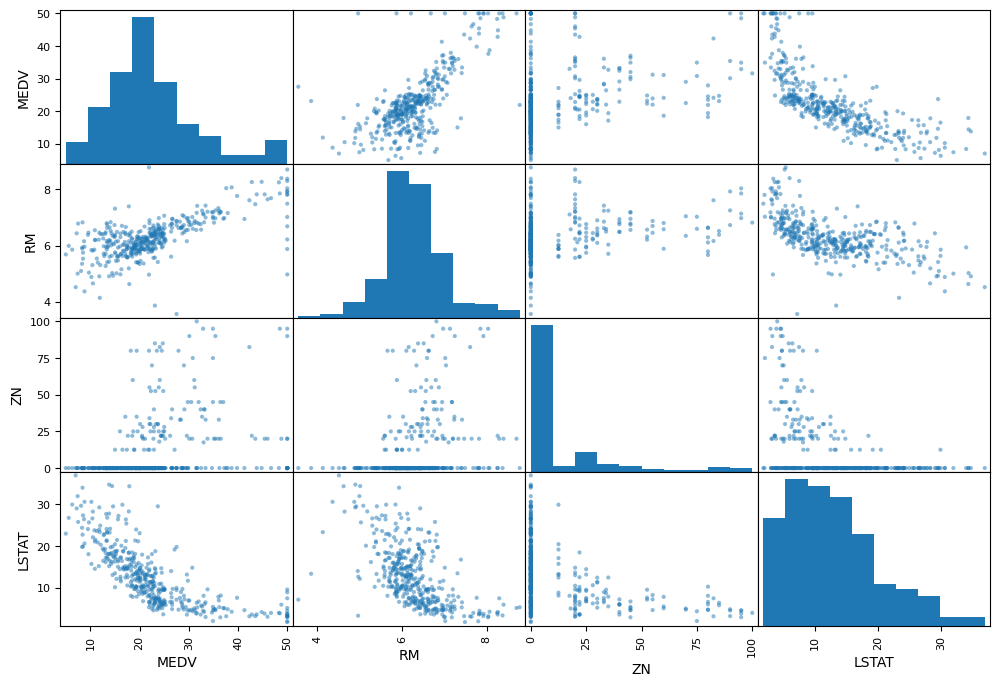

In [18]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

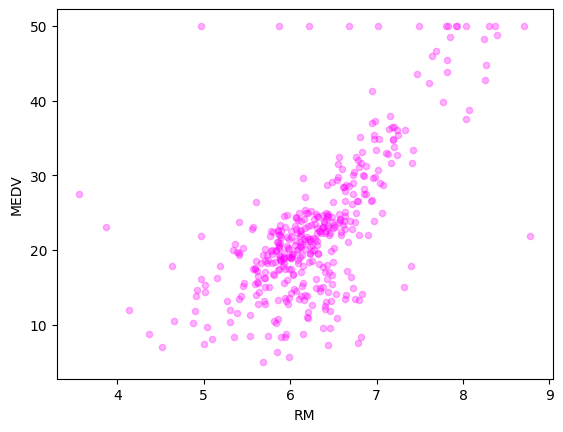

In [19]:
housing.plot(kind="scatter", y="MEDV",x="RM",alpha=0.3,c='magenta')
# we use this correlation matrix to remove the extra outliers from the graph which may distrucb the trend and analysis of the graph

## Trying out attribute combinations

In [20]:
housing['TAXRM']=housing['TAX']/housing['RM']

In [21]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [22]:
corr_matrix= housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.678634
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.526519
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

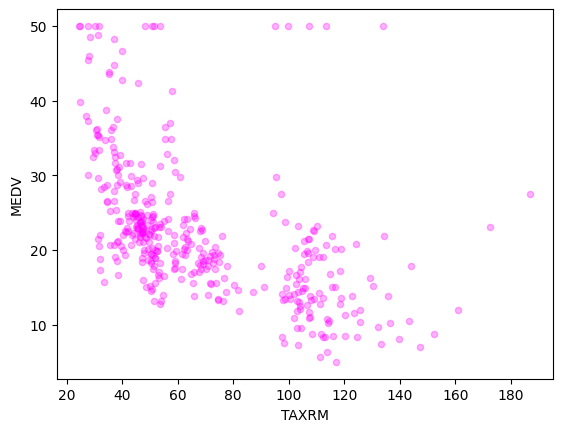

In [23]:
housing.plot(kind="scatter", y="MEDV",x="TAXRM",alpha=0.3,c='magenta')


In [24]:
housing = strat_train_set.drop("MEDV",axis=1)
housing_labels= strat_train_set["MEDV"].copy()

## Missing Attributes

In [25]:
# To take care of missing attributes, we have 3 options
# 1. remove missing data points
# 2. remove the whole attribute (incase correlation is very less than we can remove that attribute as 
# it will not contribute much in getting us a relation)
# 3. set the value to some value(zero or mean or median)

In [26]:
# option -1 

# housing.dropna(subset=["RM"],inplace=True) 
# housing.info()
#inplace=True will actually remove all the data points from the housing if we don't use this than we get a 
#copy of housing without those data points in a

a=housing.dropna(subset=["RM"])
a.shape


(399, 13)

In [27]:
housing.drop("RM",axis=1).shape # option 2
# RM coloumn is removed and original data frame is unchanged

(404, 12)

In [28]:
median =housing["RM"].median()
median

6.216

In [29]:
housing["RM"].fillna(median) # option 3
# note that the original data frame is unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [30]:
housing.shape

(404, 13)

In [31]:
housing.describe() # before we started filling missing attributes i.e imputing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.714951,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [32]:
# now as we did for rm coloumn that if any data is missing in this col. 
# it will be replaced by its median.
  
# We will use impute from sklearn to do it for all the col. if any of 
# the data is missing it will be replace by the median

In [33]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [34]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21600e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [35]:
X= imputer.transform(housing)

In [36]:
housing_tr= pd.DataFrame(X, columns=housing.columns)

In [37]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279809,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.710538,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Sckikit - Learn Design

Primarily there are three type of objects

1. Estimators- It estimates some parameters based on a dataset. Eg. imputer.
It has a fit method and transform method. Fit method- fits the dataset and calculates internal parameters
2. Transformers- transfrom method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.
3. Predictors - Linear Regression model is an example of predictor. fit() and predict() are two common fucntions. It also gives score() function which will evaluate the predictions.

## Feature Scaling

Primarily, two types of feature scaling

1. Min-max scaling == (value-min)/(max-min) (normalization)
Sklearn provides a class called MinMaxScaler for this

2. standardization == (value-mean)/std 
Sklearn provides a class called Standard Scalar for this

## Creating a Pipeline

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([  # it takes input of a list of pipelines
    ('imputer',SimpleImputer(strategy="median")),
    #.. add as many as you want in your pipeline
    ('std_scaler',StandardScaler()),
])

In [39]:
housing_num_tr = my_pipeline.fit_transform(housing)
# housing_num_tr is a numpy array as we can give input to predictors in numpy array only

In [40]:
housing_num_tr.shape

(404, 13)

## Selecting a desired model to Predict Price of Real State

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# model= LinearRegression()
# model = DecisionTreeRegressor()
model =RandomForestRegressor()

model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [42]:
some_data= housing.iloc[:5]

In [43]:
some_labels= housing_labels.iloc[:5]

In [44]:
prepared_data= my_pipeline.transform(some_data)

In [45]:
model.predict(prepared_data)

array([22.292, 25.426, 16.552, 23.265, 23.534])

In [46]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [47]:
from sklearn.metrics import mean_squared_error 
housing_predictions= model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse= np.sqrt(mse)

In [48]:
rmse # we can see overfitting here

1.1869161826988768

## Using better evaluation technique - Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [50]:
rmse_scores

array([2.78731026, 2.8570386 , 4.42453346, 2.5389685 , 3.41633804,
       2.90577512, 4.29231717, 3.29347092, 3.15407715, 3.35444482])

In [51]:
def print_scores(scores):
    print("Scores: ",scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ",scores.std())

In [52]:
print_scores(rmse_scores)

Scores:  [2.78731026 2.8570386  4.42453346 2.5389685  3.41633804 2.90577512
 4.29231717 3.29347092 3.15407715 3.35444482]
Mean:  3.302427404590035
Standard Deviation:  0.5899739497436636


## Saving the Model

In [53]:
from joblib import dump,load
dump(model,'Price_Predictor.joblib')

['Price_Predictor.joblib']

## Testing the model on test data

In [56]:
x_test=strat_test_set.drop("MEDV",axis=1)
y_test=strat_test_set["MEDV"].copy()
x_test_prepared=my_pipeline.transform(x_test)
final_predictions=model.predict(x_test_prepared)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
# print(final_predictions,list(y_test))

[24.429 11.789 25.275 21.91  18.636 14.893 20.249 14.686 32.054 40.522
 19.804 11.984 24.181 24.641 19.592 11.16  31.604 14.684 23.744 18.779
 19.73  17.103 18.008 21.92  18.857 31.727 16.133 33.487  8.735 34.239
 24.042 21.047 23.074 11.196 21.361 11.268 42.876 24.911 24.143 42.121
 23.995 29.129 20.505 21.232 18.29  33.762 44.202 20.172 20.469 22.172
 20.432 14.615 21.355 15.193 24.369 33.126 42.346 29.163 18.889 20.768
 46.506 10.207 18.594 25.102 15.361 33.173 19.543 18.27  19.728 33.888
 29.643 22.965 21.217 22.704 34.331 13.249 15.878 20.165 20.461 21.245
 22.675 21.339 13.85  24.172 20.552 21.333 14.102 20.975 22.45  23.112
 18.549 27.21   7.499 26.234 19.    29.997 19.754 31.836 14.633 27.35
 21.139 20.915] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1,

In [55]:
final_rmse

3.0179075792447216

In [57]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24210169, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the model

In [58]:
from joblib import dump,load
import numpy as np

model=load('Price_Predictor.joblib')
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24210169, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.292])